# Homework 1
Due Monday, Jan. 30 \
Tristan Larkin

### Problem 1:
Consider a cart rolling down a slope. If you measure the velocity of the cart at two points separated by a distance “d”, you can estimate the acceleration “a” of the cart using the constant-acceleration formula: 
$$ v_{2}^2 = v_1^2 + 2ad $$
If a student performs the measurements of the velocities and distance 12 times with results:

In [138]:
ds   = [197.7, 197.7, 197.7, 197.7, 197.7, 197.7, 
        197.7, 197.7, 197.7, 197.7, 197.7, 197.7]
v_1s = [186,   184.3, 185.8, 186.8, 181.9, 185.2, 
        184,   185.7, 186,   185.5, 182.5, 183.8]
v_2s = [323.5, 320.6, 323.2, 324.8, 316.4, 322.1, 
        320,   322.9, 323.5, 322.6, 317.4, 319.6]

(a) Calculate the average and the standard deviation for each of the measured quantities. 

In [139]:
import numpy as np

def average(ls: list[float]) -> float:
    return sum(ls)/len(ls)

d_avg   = average(ds)
v_1_avg = average(v_1s)
v_2_avg = average(v_2s)

def std_dev(ls) -> float:
    mu = average(ls)
    foo = [(x - mu)**2 for x in ls]
    return np.sqrt(sum(foo)/len(ls))

d_sd   = std_dev(ds)
v_1_sd = std_dev(v_1s)
v_2_sd = std_dev(v_2s)

print(f"The average d value is {d_avg:.2f} m \n\
        and the standard deviation is {d_sd:.2f}.")
print(f"The average v_1 value is {v_1_avg:.2f} m/s \n\
        and the standard deviation is {v_1_sd:.2f}.")
print(f"The average v_2 value is {v_2_avg:.2f} m/s \n\
        and the standard deviation is {v_2_sd:.2f}.")


The average d value is 197.70 m 
        and the standard deviation is 0.00.
The average v_1 value is 184.79 m/s 
        and the standard deviation is 1.44.
The average v_2 value is 321.38 m/s 
        and the standard deviation is 2.49.


(b) Calculate the acceleration “a”. 

In [140]:
print(f"The acceleration is a = {(v_2_avg**2 - v_1_avg**2)/(2*d_avg):.1f}.")

The acceleration is a = 174.9.


(c) Calculate the different contributions to the error in a, and calculate the total error of a using error propagation of a multivariable function.

The formula for error propogation is 
$$ \Delta a = \sqrt{\sum_i(\frac{\partial a}{\partial x_i}\Delta x_i)^2} $$
and in our case of 
$$ a = \frac{v_{2}^2 - v_1^2}{2d}$$
we have the partial derivatives
$$\frac{\partial a}{\partial d} = -\frac{v_2^2 - v_1^2}{2d^2}$$
$$\frac{\partial a}{\partial v_1} = -\frac{v_1}{d}$$
$$\frac{\partial a}{\partial v_2} = \frac{v_2}{d}$$

In [141]:
class UncertainNumber:
    def __init__(self, val:float, unc:float = 0) -> None:
        self.val = val
        self.unc = unc

    def __str__(self) -> str:
        return f"{self.val:.2f} +/- {self.unc:.2f}"

    def get_error(self) -> float:
        return self.unc / self.val

d   = UncertainNumber(d_avg, d_sd)
v_1 = UncertainNumber(v_1_avg, v_1_sd)
v_2 = UncertainNumber(v_2_avg, v_2_sd)

a = UncertainNumber(((v_2.val**2) - (v_1.val**2))/(2*d.val))

dadd  = -((v_2.val**2) - (v_1.val**2))/(2*d.val**2)
dadv1 = -(v_1.val)/(d.val)
dadv2 = (v_2.val)/(d.val)

a.unc = np.sqrt((dadd * d.unc)**2 + (dadv1 * v_1.unc)**2 + (dadv2 * v_2.unc)**2)

print(f"The value is a = {a}.")
print(f"There is an error of {a.get_error()*100:.2f}%.")

The value is a = 174.86 +/- 4.27.
There is an error of 2.44%.


### Problem 2
A student measures the voltage drop across a resistor of as a function of applied current to the resistor.  She/he takes six runs of data shown in the table below.

In [142]:
from tabulate import tabulate

titles = ['I (mA)', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V_avg', 'V_std', 'I_std', 'R_avg', 'R_std']
data   = [[1,  5.03,  3.58,  2.67,  2.72,  2.63,  3.42 ],
          [2,  7.31,  7.31,  9.39,  9.39,  8.84,  7.27 ],
          [4,  12.78, 11.80, 11.57, 11.38, 10.85, 12.15],
          [6,  13.33, 14.95, 15.27, 12.69, 16.78, 15.58],
          [8,  16.55, 17.77, 16.64, 16.52, 17.69, 19.44],
          [10, 20.03, 21.26, 20.75, 20.92, 21.57, 20.17]]

table = [titles] + data

print(tabulate(table, headers='firstrow', floatfmt='.2f'))

  I (mA)     V1     V2     V3     V4     V5     V6
--------  -----  -----  -----  -----  -----  -----
       1   5.03   3.58   2.67   2.72   2.63   3.42
       2   7.31   7.31   9.39   9.39   8.84   7.27
       4  12.78  11.80  11.57  11.38  10.85  12.15
       6  13.33  14.95  15.27  12.69  16.78  15.58
       8  16.55  17.77  16.64  16.52  17.69  19.44
      10  20.03  21.26  20.75  20.92  21.57  20.17


(a) For the data runs obtain the average voltage as a function of applied current, and the standard deviation of the voltage for each value of applied current. Show the equations for the calculation.  

$$ V_{avg} = \frac{\sum_i (V_i)}{N} $$
$$ V_{std} = \sqrt{\frac{\sum_i (V_i - {V_{avg}})^2}{N}} $$

In [143]:
import copy

data2 = copy.deepcopy(data)

for i, current in enumerate(data2):
    data2[i].append(average(current[1:]))
    data2[i].append(std_dev(current[1:]))

table = [titles] + data2

x = tabulate(table, headers='firstrow', floatfmt='.2f')
print(x)

  I (mA)     V1     V2     V3     V4     V5     V6    V_avg    V_std
--------  -----  -----  -----  -----  -----  -----  -------  -------
       1   5.03   3.58   2.67   2.72   2.63   3.42     3.34     0.78
       2   7.31   7.31   9.39   9.39   8.84   7.27     8.25     0.90
       4  12.78  11.80  11.57  11.38  10.85  12.15    11.76     0.56
       6  13.33  14.95  15.27  12.69  16.78  15.58    14.77     1.27
       8  16.55  17.77  16.64  16.52  17.69  19.44    17.43     0.96
      10  20.03  21.26  20.75  20.92  21.57  20.17    20.78     0.51


(b) Using ~~Matlab~~ **_Python_**, plot the voltage as a function of current for the 6 runs in the same figure. \
(c) In a second figure plot the average voltage (Vave) as a function of current and show for each point its standard deviation (σv) with an error bar (use “errorbar” function in  Matlab.) 

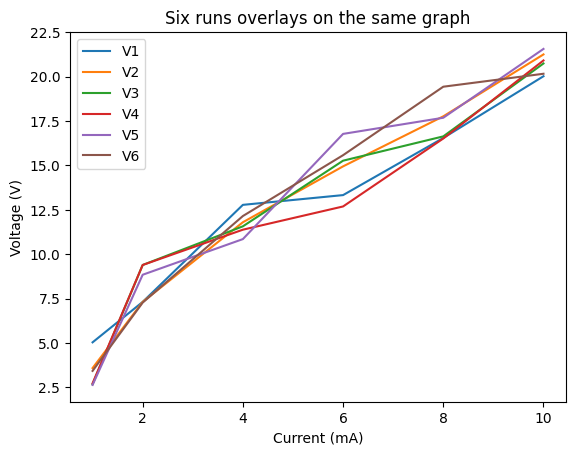

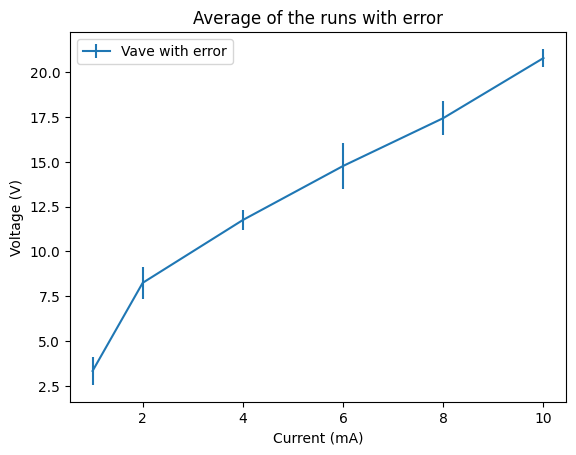

In [144]:
import matplotlib.pyplot as plt


current_values = [line[0] for line in data2] 
xs = [current_values] * 6
ys = [col[:6] for col in np.transpose(data2)[1:7]]

plt.figure()
for x, y in zip(xs, ys):
    plt.plot(x, y)
plt.legend(titles[1:7])
plt.title("Six runs overlays on the same graph")
plt.xlabel("Current (mA)")
plt.ylabel("Voltage (V)")
plt.show()

plt.figure()
plt.errorbar(current_values, 
             np.transpose(data2)[7], 
             yerr=np.transpose(data2)[8])
plt.legend(["Vave with error"])
plt.title("Average of the runs with error")
plt.xlabel("Current (mA)")
plt.ylabel("Voltage (V)")
plt.show()

(d) Assume that the current has a relative error $(σ_I/I)=10^{-3}$ so that $σ_I=I*10^{-3}$ in every run. Using the values of the voltage (Vave and $σ_v$) and the current ($I$ and $σ_I$) for each row with a constant current value, estimate the resistance R and its error $σ_R$ for every row (to determine the error you need to use error propagation).

Current and voltage are related by Ohm's law: $R = \frac{V}{I}$.\
\
Then we can use the multiplication/division formula for error propogation:
$$ \Delta R = R \sqrt{(\frac{\Delta V}{V_{avg}})^2 + (\frac{\Delta I}{I_{avg}})^2} $$
We need to do this for each row.

In [145]:
data3 = copy.deepcopy(data2)
titles3 = ['I (mA)', 'V_avg (V)', 'V_std (V)', 'I_std (mA)', 'R_avg (kΩ)', 'R_std (kΩ)']

# update the I_std column
for line in data3: 
    line.append(line[0] * 10e-3)

# update the R_avg column
for line in data3:
    line.append(line[0]/line[7])

# update the R_std column
for line in data3:
    unc = line[10] * np.sqrt((line[9]/line[0])**2 + (line[8]/line[7])**2)
    line.append(unc)

for line in data3:
    for _ in range(6):
        line.pop(1)

print(tabulate(data3, headers=titles3))

  I (mA)    V_avg (V)    V_std (V)    I_std (mA)    R_avg (kΩ)    R_std (kΩ)
--------  -----------  -----------  ------------  ------------  ------------
       1      3.34167     0.779879          0.01      0.299252     0.0699036
       2      8.25167     0.900387          0.02      0.242375     0.0265578
       4     11.755       0.560937          0.04      0.340281     0.0165906
       6     14.7667      1.27495           0.06      0.406321     0.0353162
       8     17.435       0.959892          0.08      0.458847     0.0256754
      10     20.7833      0.508434          0.1       0.481155     0.0127162
